In [62]:
%matplotlib inline

import matplotlib as mpl
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [66]:
from urllib import request

url = "https://github.com/jehyunlee/image_processing/blob/master/meta2jpg/_SEM/1_1.tif"
savename = "1_1.tif"

request.urlretrieve(url, savename)

('1_1.tif', <http.client.HTTPMessage at 0x7f2d4cba4390>)

In [68]:
penguins = sns.load_dataset("penguins")
penguins

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female
...,...,...,...,...,...,...,...
339,Gentoo,Biscoe,NaN,NaN,NaN,NaN,NaN
340,Gentoo,Biscoe,46.8,14.3,215.0,4850.0,Female
341,Gentoo,Biscoe,50.4,15.7,222.0,5750.0,Male
342,Gentoo,Biscoe,45.2,14.8,212.0,5200.0,Female


In [72]:
np.random.choice(np.arange(1000, 1014), size=14, replace=False)

array([1008, 1001, 1004, 1002, 1009, 1013, 1012, 1007, 1010, 1000, 1011,
       1005, 1003, 1006])

In [74]:
penguins["id"] = np.random.choice(np.arange(1000, 2000), size=344, replace=False)
penguins

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,id
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male,1889
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female,1950
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female,1351
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN,1850
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female,1391
...,...,...,...,...,...,...,...,...
339,Gentoo,Biscoe,NaN,NaN,NaN,NaN,NaN,1035
340,Gentoo,Biscoe,46.8,14.3,215.0,4850.0,Female,1415
341,Gentoo,Biscoe,50.4,15.7,222.0,5750.0,Male,1000
342,Gentoo,Biscoe,45.2,14.8,212.0,5200.0,Female,1711


In [76]:
# duplicated data
penguins_dup = penguins.sample(n=12, replace=True)

In [79]:
# wrong data
penguins_wrong = penguins.sample(n=24, replace=False)
penguins_wrong.dropna(inplace=True)
penguins_wrong["bill_length_mm"] = penguins_wrong["bill_length_mm"]/10
penguins_wrong["bill_depth_mm"] = penguins_wrong["bill_depth_mm"]/10
penguins_wrong["flipper_length_mm"] = penguins_wrong["flipper_length_mm"]/10

In [87]:
penguins_work = pd.concat([penguins, penguins, penguins_wrong], axis=0).sample(frac=1).reset_index()
penguins_work.drop("index", axis=1, inplace=True)
penguins_work.to_pickle("penguins_pega.pkl")

In [5]:
# encoder
from sklearn.preprocessing import OneHotEncoder

# machine learning models
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

# pipeline
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

# data split
from sklearn.model_selection import train_test_split

In [43]:
penguins.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            344 non-null    object 
 1   island             344 non-null    object 
 2   bill_length_mm     342 non-null    float64
 3   bill_depth_mm      342 non-null    float64
 4   flipper_length_mm  342 non-null    float64
 5   body_mass_g        342 non-null    float64
 6   sex                333 non-null    object 
dtypes: float64(4), object(3)
memory usage: 18.9+ KB


In [44]:
penguins.describe(include="all")

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
count,344,344,342.000000,342.000000,342.000000,342.000000,333
unique,3,3,NaN,NaN,NaN,NaN,2
top,Adelie,Biscoe,NaN,NaN,NaN,NaN,Male
freq,152,168,NaN,NaN,NaN,NaN,168
mean,NaN,NaN,43.921930,17.151170,200.915205,4201.754386,NaN
std,NaN,NaN,5.459584,1.974793,14.061714,801.954536,NaN
min,NaN,NaN,32.100000,13.100000,172.000000,2700.000000,NaN
25%,NaN,NaN,39.225000,15.600000,190.000000,3550.000000,NaN
50%,NaN,NaN,44.450000,17.300000,197.000000,4050.000000,NaN
75%,NaN,NaN,48.500000,18.700000,213.000000,4750.000000,NaN


In [45]:
penguins.dropna(inplace=True)

In [46]:
penguins.describe(include="all")

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
count,333,333,333.000000,333.000000,333.000000,333.000000,333
unique,3,3,NaN,NaN,NaN,NaN,2
top,Adelie,Biscoe,NaN,NaN,NaN,NaN,Male
freq,146,163,NaN,NaN,NaN,NaN,168
mean,NaN,NaN,43.992793,17.164865,200.966967,4207.057057,NaN
std,NaN,NaN,5.468668,1.969235,14.015765,805.215802,NaN
min,NaN,NaN,32.100000,13.100000,172.000000,2700.000000,NaN
25%,NaN,NaN,39.500000,15.600000,190.000000,3550.000000,NaN
50%,NaN,NaN,44.500000,17.300000,197.000000,4050.000000,NaN
75%,NaN,NaN,48.600000,18.700000,213.000000,4775.000000,NaN


In [47]:
p_Train, p_test = train_test_split(penguins, test_size=0.2, stratify=penguins[["species", "island", "sex"]])
p_train, p_val = train_test_split(p_Train, test_size=0.25, stratify=p_Train[["species", "island", "sex"]])

In [48]:
X_cols = ["species", "island", "sex", "bill_length_mm", "bill_depth_mm", "flipper_length_mm"]
y_col = "body_mass_g"

In [50]:
X_train = p_train[X_cols]
X_val = p_val[X_cols]
X_test = p_test[X_cols]

y_train = p_train[y_col]
y_val = p_val[y_col]
y_test = p_test[y_col]

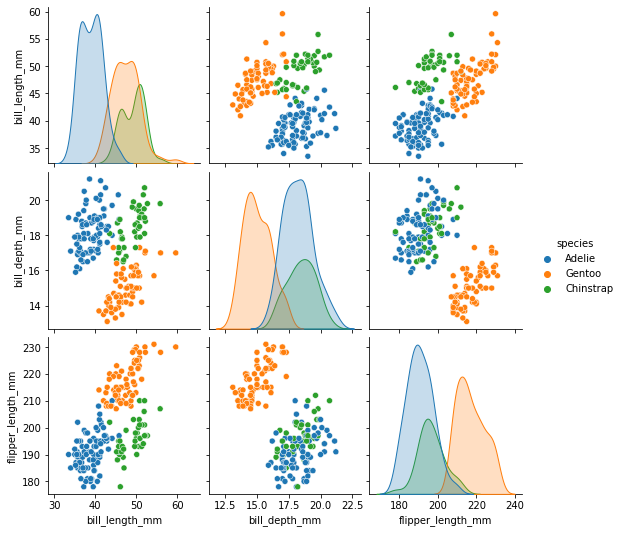

In [54]:
sns.pairplot(X_train, hue="species")

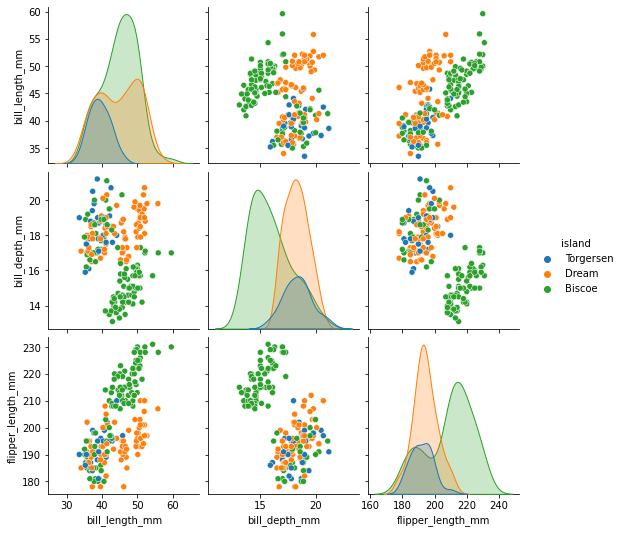

In [55]:
sns.pairplot(X_train, hue="island")

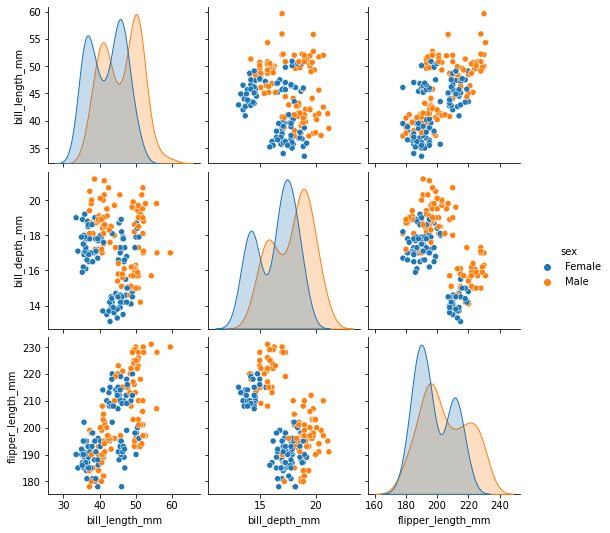

In [56]:
sns.pairplot(X_train, hue="sex")

<AxesSubplot:xlabel='species', ylabel='count'>

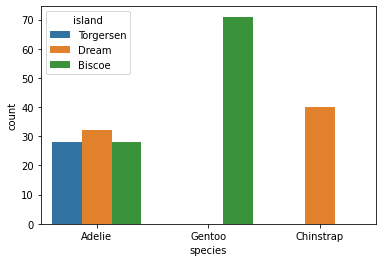

In [51]:
sns.countplot(x="species", hue="island", data=X_train)

<AxesSubplot:xlabel='flipper_length_mm', ylabel='Density'>

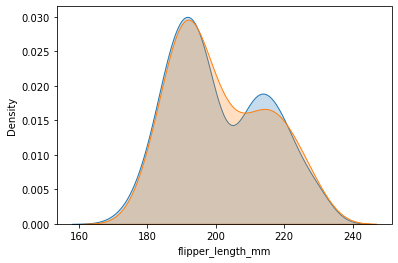

In [29]:
sns.kdeplot(x="flipper_length_mm", data=X_train, fill=True)
sns.kdeplot(x="flipper_length_mm", data=X_test, fill=True)

In [59]:
cat_features = ["species", "island", "sex"]
cat_transformer = OneHotEncoder(sparse=False)

num_features = list(set(X_cols) - set(cat_features))
num_transformer = Pipeline(steps=[("scaler", StandardScaler()), 
                                  ("poly", PolynomialFeatures(degree=2, 
                                                              include_bias=True))])

preprocessor = ColumnTransformer(transformers=[("num", num_transformer, num_features), 
                                               ("cat", cat_transformer, cat_features)])

model = Pipeline(steps=[("preprocessor", preprocessor), 
                        ("linear", LinearRegression())])

In [60]:
model.fit(X_train, y_train)
y_pred_train = model.predict(X_train)
y_pred_test = model.predict(X_test)

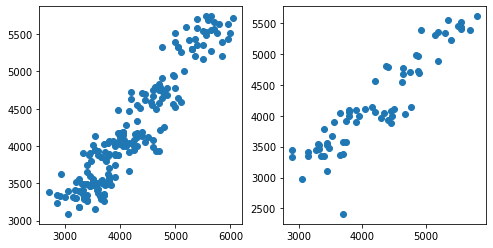

In [63]:
fig, axs = plt.subplots(ncols=2, figsize=(8, 4))
axs[0].scatter(y_train, y_pred_train)
axs[1].scatter(y_test, y_pred_test)